# Misc functionnalities

## Content

- Subdivision of all triangles in the scene
- Visualisation with VTK
- External tools for analysing leaf angle distribution from a mesh

## Introduction

We provide more useful tools to help the lighting management

In [1]:
import os
from lightvegemanager.LVM import LightVegeManager
from pgljupyter import SceneWidget
from lightvegemanager.trianglesmesh import random_triangle_generator

## Simple mesh subdivision

If you want to refine the shadowing process in your mesh, you can subdivide all triangles.

In [2]:
# random triangles
nb_triangles = 50
spheresize = (1., 0.3) # vertices of triangles are the sphere surface
worldsize = (0., 5.)
triangles = [random_triangle_generator(worldsize=worldsize, spheresize=spheresize) for i in range(nb_triangles)]

In [3]:
lighting = LightVegeManager(lightmodel="caribu")
lighting.build(geometry=triangles)
SceneWidget(lighting.plantGL_nolight(), 
            position=(-2.5, -2.5, 0.0), 
            size_display=(600, 400), 
            plane=True, 
            size_world = 10, 
            axes_helper=True)

SceneWidget(axes_helper=True, scenes=[{'id': 'O9xJcnvhQDpm2yuSozG1BZUoe', 'data': b'x\xda\x8d\x99yXUU\x17\xc6/…

In [4]:
global_scene_tesselate_level = 5
lighting.build(geometry=triangles, global_scene_tesselate_level=global_scene_tesselate_level)
SceneWidget(lighting.plantGL_nolight(), 
            position=(-2.5, -2.5, 0.0), 
            size_display=(600, 400), 
            plane=True, 
            size_world = 10, 
            axes_helper=True)

SceneWidget(axes_helper=True, scenes=[{'id': 'LgksLWwDW2DzGMUPPzSXEoOnw', 'data': b'x\xda\x94]\x07x]\xc5\xb16\…

## Visualisation with VTK

PlantGL offers a good first approach to visualizing scene geometry, but software such as Paraview can take this visualization even further. LightVegeManager lets you export the scene in VTK format for further processing in ParaView.

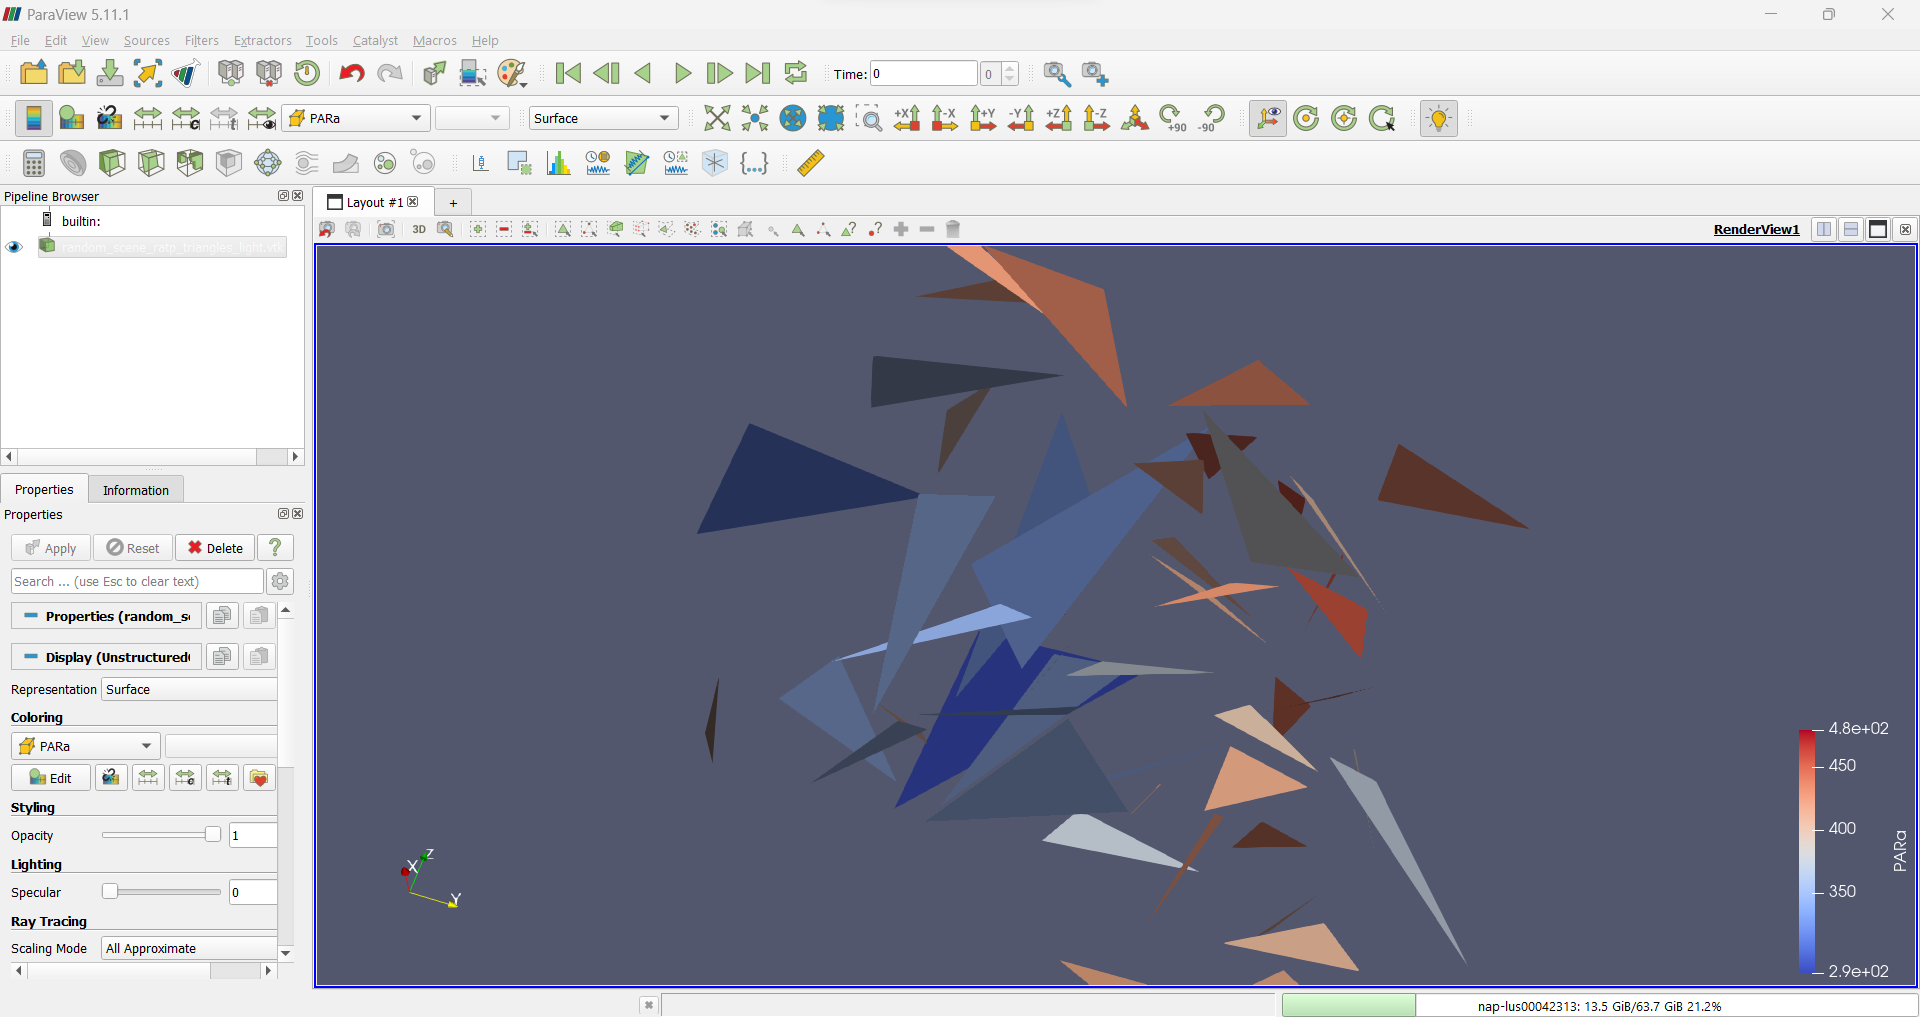

There are three method to export VTK files:
- `VTK_nolight`: exports only the geometric information, organ ID and specy ID
- `VTK_light`: adds all the information about the scene's sunlight
- `VTK_sun`: exports sun direction of the current iteration


### Triangles exportation

In [10]:
lighting = LightVegeManager(lightmodel="caribu")
lighting.build(geometry=triangles)

In [11]:
pathfile = "random_scene"

In [12]:
lighting.VTK_nolight(pathfile)

In [13]:
energy = 500.
hour = 15
day = 264
lighting.run(energy=energy, hour=hour, day=day)

In [14]:
lighting.VTK_light(pathfile)

### Voxels exportation

If you use voxels grid, you exports them too. In our example, it will exports the triangles mesh and the voxels mesh specified in the inputs.

In [15]:
ratp_parameters = {"voxel size" : [1., 1., 1.] }
lighting = LightVegeManager(lightmodel="ratp", lightmodel_parameters=ratp_parameters)
lighting.build(geometry=triangles)

In [16]:
pathfile = "random_scene_ratp"

In [17]:
lighting.VTK_nolight(pathfile, printtriangles=True, printvoxels=True)

In [18]:
energy = 500.
hour = 15
day = 264
lighting.run(energy=energy, hour=hour, day=day)

In [19]:
lighting.VTK_light(pathfile, printtriangles=True, printvoxels=True)

## Analyze with s2v and s5

We added the possibility to call s2v and s5, two analysis tools which returns informations in order to convert the triangle mesh in a RATP grid format. Depending on the grid dimensions you specify, it will return leaf area in each voxel (depending on the barycenter position of each triangle in the grid) and leaf angle distribution.

In [6]:
# random triangles
nb_triangles = 5
spheresize = (1., 0.3) # vertices of triangles are the sphere surface
worldsize = (0., 5.)
triangles = [random_triangle_generator(worldsize=worldsize, spheresize=spheresize) for i in range(nb_triangles)]

### s5 (fortran)

In [7]:
ratp_parameters = {"voxel size" : [1., 1., 1.] }
lighting = LightVegeManager(lightmodel="ratp", lightmodel_parameters=ratp_parameters)
lighting.build(geometry=triangles)

In [8]:
lighting.s5()


--- Fin de s5.f


#### Description of `fort.60`

- xy dimension of the scene
- statistics per specy
    - Total leaf area
    - Leaf area index
    - Global zenith angle distribution
    - Global azimut angle distribution
- statistics per voxel
    - #specy #ix #iy ~iz leaf area density
    - zenith angle distribution
    - azimut angle distribution

In [9]:
outfile = os.path.join(os.path.dirname(os.path.abspath("")), "s5", "fort.60")
with open(outfile, "r") as fichier:
    for ligne in fichier:
        print(ligne, end="")

 dimensions de la maquette (x,y):    5.000    3.000
 nombre de repetitions du motif:    1.0

 STATISTIQUES GLOBALES DE CHAQUE ESPECE

 espece:  1    surface foliaire: .411D+01    lai :  0.2738
 distribution en zenith:  0.0000 0.3407 0.0000 0.1688 0.0000 0.0000 0.3105 0.0000 0.1800
 distribution en azimuth: 0.0189 0.0000 0.3407 0.0000 0.3105 0.0000 0.0000 0.3299 0.0000


 STATISTIQUES PAR CELLULE

  1  1  1  1      0.041
 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  1  1  3  1      0.008
 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000
  1  2  3  1      0.011
 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000
  1  3  1  1      0.014
 0.0000 0.0000 0.0000 0.1847 0.0000 0.0000 0.0000 0.0000 0.8153
 0.1847 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.8153

#### Description of `leafarea`

- for each specy
    - for each voxel
        - ix | iy | iz | #specy | LAD | zenith angle distribution | azimut angle distribution

In [10]:
outfile = os.path.join(os.path.dirname(os.path.abspath("")), "s5", "leafarea")
with open(outfile, "r") as fichier:
    for ligne in fichier:
        print(ligne, end="")

  1  1  1  1      0.041  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
  1  1  3  1      0.008  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000
  1  2  3  1      0.011  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000
  1  3  1  1      0.014  0.000  0.000  0.000  0.185  0.000  0.000  0.000  0.000  0.815  0.185  0.000  0.000  0.000  0.000  0.000  0.000  0.815  0.000
  1  3  2  1      0.180  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000
  2  1  1  1      0.032  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000
  2  1  2  1      0.718  0.000  0.000  0.000  0.000  0.000  0.000  0.484  0.000  0.516  0.000  0.000

#### s2v (c++)

In [11]:
lighting.s2v()

--- Fin de s2v.cpp


#### Description of `s2v.log`

- Program logs
- global statistic for each specy
    - total leaf area
    - leaf area index
    - global zenith angle distribution

In [12]:
outfile = os.path.join(os.path.dirname(os.path.abspath("")), "s2v", "s2v.log")
with open(outfile, "r") as fichier:
    for ligne in fichier:
        print(ligne, end="")

.\s2v++.exe 
Lecture du fichier parametre dans fichier : 
nji=9, nja=9, njz=4
bz[0]=4
5, 5, 1, 3, 3, 1, 1
s2v.cpp:530 -> Fin de lecture de fichier
=> Calcul des distributions
==> nje rel = 1
=> Ecriture des resultats : (c|std)err, leafarea, out.dang
Il y a eu 640 depassement en z+
xl=5, yl=3, xymaille=1

STATISTIQUES GLOBALES DE CHAQUE ESPECE
esp 1 : surfT=4.10686 - Stot=4.10686, LAI=0.27379 dist d'inclinaison :0 0.340694 0 0.168815 0 0 0.310531 0 0.179961 
0.018865800.34069400.310531000.329910
genere le fichier out.dang => entree de sailM pour calculer la BRDF
	: xx= 0 ; Uz= 1e-009
ferrlog stream close() called.


#### Description of `s2v.can`

Copy of each triangle with the z layer in which the triangle belongs

In [13]:
outfile = os.path.join(os.path.dirname(os.path.abspath("")), "s2v", "s2v.can")
with open(outfile, "r") as fichier:
    for ligne in fichier:
        print(ligne, end="")

p 2 100001001000 2  3 2.985657 4.113371 1.842963 2.750814 2.983446 1.871450 3.732794 3.462100 2.480996 
p 2 100001001000 2  3 3.433085 1.126134 1.322910 3.511158 2.888248 1.501685 1.933951 1.618254 1.795654 
p 2 100001001000 2  3 1.039979 3.215031 1.956095 0.182558 1.870699 2.746943 0.636121 2.520374 3.280594 
p 2 100001001000 2  3 2.120032 3.026543 3.191847 0.226976 3.530282 1.788605 2.980323 3.379190 2.619068 
p 2 100001001000 0  3 4.355116 3.219292 4.362386 4.516341 3.181239 4.363903 4.653955 2.345981 3.852559 


#### Description of `s2v.area`

each line contains: triangle id | z layer | triangle area

In [14]:
outfile = os.path.join(os.path.dirname(os.path.abspath("")), "s2v", "s2v.area")
with open(outfile, "r") as fichier:
    for ligne in fichier:
        print(ligne, end="")

100001001000	 2	 0.615819
100001001000	 2	 1.39918
100001001000	 2	 0.739072
100001001000	 2	 1.27531
100001001000	 0	 0.0774794


#### Description of `out.dang`

File for SAIL model
- line 1: global leaf area index for specy 1
- line 2: global zenith angle distribution for specy 1

In [15]:
outfile = os.path.join(os.path.dirname(os.path.abspath("")), "s2v", "out.dang")
with open(outfile, "r") as fichier:
    for ligne in fichier:
        print(ligne, end="")

0.273790
0.000000 0.340694 0.000000 0.168815 0.000000 0.000000 0.310531 0.000000 0.179961 

#### Description of `leafarea`

File for SAIL model
each line:
    - 0 idz "Leaf area index by layer inclination class" 0 0 "total leaf area density on the z layer"

In [16]:
outfile = os.path.join(os.path.dirname(os.path.abspath("")), "s2v", "leafarea")
with open(outfile, "r") as fichier:
    for ligne in fichier:
        print(ligne, end="")

  0  1  0.000000 0.000000 0.000000 0.353762 0.000000 0.000000 0.267263 0.000000 0.378975 0 0 0.219015
  0  2  0.000000 0.000000 0.000000 0.167022 0.000000 0.000000 0.533621 0.000000 0.299357 0 0 2.189191
  0  3  0.000000 0.823702 0.000000 0.147280 0.000000 0.000000 0.028594 0.000000 0.000425 0 0 1.698650
  0  4  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0 0 0.000000
